### The MNIST dataset, which stands for the Modified National Institute of Standards and Technology dataset, is a widely used collection of grayscale images of handwritten digits (0 through 9). It serves as a benchmark dataset in the field of machine learning, particularly for training and testing image classification algorithms
- Content: It contains images of individual handwritten digits from 0 to 9.   
- Size: The dataset is divided into two parts:
- Training set: 60,000 images used for training machine learning models.   
- Testing set: 10,000 images used for evaluating the performance of trained models.   

#### Image Format: Each image is:
- Grayscale: Meaning it has only one color channel, representing the intensity of black and white.   
- Size-normalized and centered: The digits have been scaled and positioned within a fixed size.   
- Resolution: 28x28 pixels. 

In [11]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [12]:
# Load and preprocess the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

Training images shape: (60000, 28, 28)
Training labels shape: (60000,)
Testing images shape: (10000, 28, 28)
Testing labels shape: (10000,)


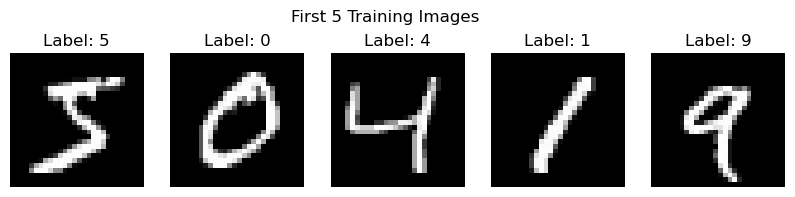

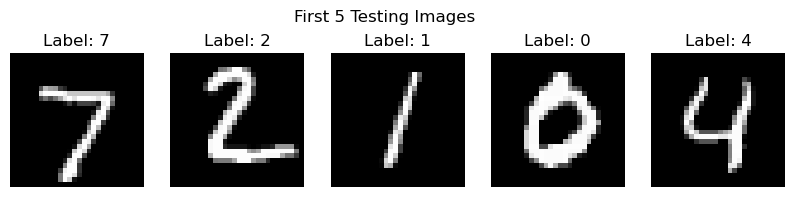

In [13]:
# Print the sizes of the datasets
print("Training images shape:", train_images.shape)
print("Training labels shape:", train_labels.shape)
print("Testing images shape:", test_images.shape)
print("Testing labels shape:", test_labels.shape)

# Display at least 5 training images
plt.figure(figsize=(10, 2))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(train_images[i], cmap='gray')
    plt.title(f"Label: {train_labels[i]}")
    plt.axis('off')
plt.suptitle("First 5 Training Images", y=1.05)
plt.show()

# Display at least 5 testing images
plt.figure(figsize=(10, 2))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(test_images[i], cmap='gray')
    plt.title(f"Label: {test_labels[i]}")
    plt.axis('off')
plt.suptitle("First 5 Testing Images", y=1.05)
plt.show()

#### Pixel values in the original images range from 0 to 255. Dividing by 255.0 scales these values to the range [0, 1]. 
- This normalization helps in faster and more stable training of the neural network.
- Dimensions remain the same: train_images: (60000, 28, 28), test_images: (10000, 28, 28).

In [3]:
# Normalize pixel values to be between 0 and 1
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

#### Convolutional layers in Keras (and most deep learning frameworks) expect the input to have a specific shape that includes the number of color channels. 
- For grayscale images like MNIST, the number of channels is 1.
- reshape() is used to add this channel dimension.

In [4]:
# Reshape images to (height, width, channels) for CNN input
img_rows, img_cols = train_images.shape[1], train_images.shape[2]
train_images = train_images.reshape(train_images.shape[0], img_rows, img_cols, 1)
test_images = test_images.reshape(test_images.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

#### New Dimensions:
- train_images: (60000, 28, 28, 1)
- test_images: (10000, 28, 28, 1)
- input_shape: (28, 28, 1) - This tuple defines the expected shape of each input sample for the first layer of the CNN.

In [5]:
# Convert labels to one-hot encoded vectors
num_classes = 10
train_labels = to_categorical(train_labels, num_classes)
test_labels = to_categorical(test_labels, num_classes)

#### New Dimensions:
- train_labels: (60000, 10)
- test_labels: (10000, 10)

In [6]:
# Define the CNN model
def create_cnn_model(input_shape, num_classes):
    model = models.Sequential()
    model.add(layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(num_classes, activation='softmax'))
    return model

In [ ]:
# Create and compile the model
cnn_model = create_cnn_model(input_shape, num_classes)
cnn_model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

- cnn_model = create_cnn_model(input_shape, num_classes): Calls the function to build the CNN model.
- cnn_model.compile(...): Configures the model for training.
- loss='categorical_crossentropy': The loss function used for multi-class classification with one-hot encoded labels. It measures the difference between the predicted probability distribution and the true distribution.
- optimizer='adam': An adaptive optimization algorithm commonly used for training deep learning models. It adjusts the learning rate during training.
- metrics=['accuracy']: The metric used to evaluate the performance of the model during training and testing.

In [7]:
# Train the model
epochs = 10
batch_size = 128
cnn_model.fit(train_images, train_labels,
              batch_size=batch_size,
              epochs=epochs,
              verbose=1,
              validation_data=(test_images, test_labels))

Epoch 1/10
469/469 [==============================] - 20s 42ms/step - loss: 0.3200 - accuracy: 0.9023 - val_loss: 0.0634 - val_accuracy: 0.9799
Epoch 2/10
469/469 [==============================] - 20s 44ms/step - loss: 0.1012 - accuracy: 0.9699 - val_loss: 0.0439 - val_accuracy: 0.9857
Epoch 3/10
469/469 [==============================] - 21s 45ms/step - loss: 0.0737 - accuracy: 0.9776 - val_loss: 0.0355 - val_accuracy: 0.9881
Epoch 4/10
469/469 [==============================] - 19s 41ms/step - loss: 0.0587 - accuracy: 0.9821 - val_loss: 0.0307 - val_accuracy: 0.9902
Epoch 5/10
469/469 [==============================] - 20s 42ms/step - loss: 0.0509 - accuracy: 0.9846 - val_loss: 0.0284 - val_accuracy: 0.9901
Epoch 6/10
469/469 [==============================] - 19s 41ms/step - loss: 0.0446 - accuracy: 0.9863 - val_loss: 0.0279 - val_accuracy: 0.9910
Epoch 7/10
469/469 [==============================] - 20s 42ms/step - loss: 0.0399 - accuracy: 0.9876 - val_loss: 0.0270 - val_accuracy:

In [8]:
# Evaluate the model
score = cnn_model.evaluate(test_images, test_labels, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.024797888472676277
Test accuracy: 0.9922000169754028


In [9]:
# Save the trained model
model_path = 'mnist_cnn_model.h5'
cnn_model.save(model_path)
print(f'Model saved at {model_path}')

Model saved at mnist_cnn_model.h5
